# PET Energy Data Visialization
Here the .txt file which is the output of the bin_to_text program are analysed. The data contains
8 columns, they are classified as
* detector coincidences, $1^\mathrm{st}$ column, which are binary. e.g 1 for 24 and 0 for 1 qand 3
* $2^\mathrm{nh}, 3^\mathrm{rd},  4^\mathrm{th}$ are x, y and energy for the first detector
* $5^\mathrm{th}, 6^\mathrm{th},  7^\mathrm{th}$ are x, y and energy for the second detector
* $8^\mathrm{th}$ the time stamp for the event

In this notbook, the following energy spectrum are visualized
1. Energy spectrum of the while data
2. Energy spectrum of detectors at edges and in the middle
3. Comparison between symmetric positions
4. Singles energy spectrums

The data is obtained from a cylindrical phantom. Cylindrical phantom as expected to send out a uniformly anount or gammas to each detector pair. As a result, we expect that the counts recorded in each detector pair should be approximately the same. This will be onserved as we go along. A significant difference could be attributed to nonuniformities resulting from mixing the FDG.

<img src="https://github.com/jnsofini/Computed-Tomography/blob/master/figures/dp.png">

Last edited ; Tue Jul 09, 2019

### 1. Packages used in the notebook

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#import os.path as path
#import time
import seaborn as sns

# Set plot sizes
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
sns.set()

Resources used in this file.
 - The following file is used through out the program
 - The program [here](https://github.com/jnsofini/Computed-Tomography/blob/master/parser_binary_to_text.py) is used to obtain the .txt file

In [8]:
infile = '/--/--/--/--/cyl_data_gev.txt'

### 2. Energy distribution of the detectors
First check the energy distribution to see where the peak energy is. Should be 511 keV is the settings are all good.

In [47]:
def getEnergy(fh):
    '''
    Reads the text file and select the energy of those detectors in coincidence. 
    We don't need all the data so about 10^6 events can tell us.
    Pareters
    --------
    fh: imput file name
    
    energy1: An array of energies  for panel 1 
    energy2: An array of energies  for panel 2 

    '''

    energy1 = []
    energy2 = []

    fh = open(fh, "r")
    #fh.readlines(1) # Skips the first event, but it should be removed in the bin-t0-text conversion
    for i, line in enumerate(fh):
        ''' 
        Reads and the split each line. The split line contains 11 items. First 4 are coincidence, 6 are cordinates, 
        (x y e)_1 (x y e)_2 and the last one is time. (x, y)_1 are 4,5 and (x, y)_2 is 7,8    
        '''
        if i >= 10e3: break # Because we don't need all the events to see the profile
        d0, x1, y1, e1, x2, y2, e2 = line.split()        
        d0 = int(d0); x1 = int(x1); y1 = int(y1); e1 = int(e1); x2 =  int(x2); y2 = int(y2); e2 = int(e2)
        
        if d0 == 1: 
            energy1.append(e1)
        else:
            energy2.append(e2)

    fh.close()
    
    return energy1, energy2

#-------------------------------------------------------------------------------------------------------------------------------

def plotEnergy(energy):
    '''
    Takes energy array and plot it
    '''
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5), sharey=False)

    n, bins, patches = ax1.hist(energy[0], bins=100, histtype='step') 
    ax1.set_xlabel('Energy (keV)')
    ax1.set_ylabel('# of counts')
    ax1.set_title('Coincidence energy distribution det A')
    ax1.axis([0, 800, 0, np.max(n)*(1+ .10)])
    plt.gca()
    maxenergy = np.max(n)
    compton  = np.max(energy[0:400])
    ax1.annotate(s = '511 keV', xy = (511, maxenergy), xytext = (300, maxenergy), 
            arrowprops = {'facecolor':'blue', 'width': 1, 'shrink': 0.03}, backgroundcolor = 'white' )
    ax1.annotate(s = 'Scattered', xy = (250, 100), xytext = (100, maxenergy/2), 
            arrowprops = {'facecolor':'blue', 'width': 0.5, 'shrink': 0.03}, backgroundcolor = 'white' )
    #ax1.annotate(s = 'Scattered', xy = (511+50, 150), xytext = (100, maxenergy/2), 
    #        arrowprops = {'facecolor':'blue', 'width': 0.5, 'shrink': 0.03}, backgroundcolor = 'white' )    
    
    n, bins, patches = ax2.hist(energy[1], bins=100, histtype='step') 
    ax2.set_xlabel('Energy (keV)')
    #ax2.set_ylabel('Freq')
    ax2.set_title('Coincidence energy distribution det B')
    ax2.axis([0, 800, 0, np.max(n)*(1+ .10)])
    #plt.gca()
    maxenergy = np.max(n)
    compton  = np.max(energy[0:400])
    ax2.annotate(s = '511 keV', xy = (511, maxenergy), xytext = (300, maxenergy), 
            arrowprops = {'facecolor':'blue', 'width': 1, 'shrink': 0.03}, backgroundcolor = 'white' )
    ax2.annotate(s = 'Scattered', xy = (250, 100), xytext = (100, maxenergy/2), 
            arrowprops = {'facecolor':'blue', 'width': 0.5, 'shrink': 0.03}, backgroundcolor = 'white' )
    #ax2.annotate(s = 'Scattered', xy = (511+50, 150), xytext = (100, maxenergy/2), 
     #       arrowprops = {'facecolor':'blue', 'width': 0.5, 'shrink': 0.03}, backgroundcolor = 'white' )
    plt.show()
    

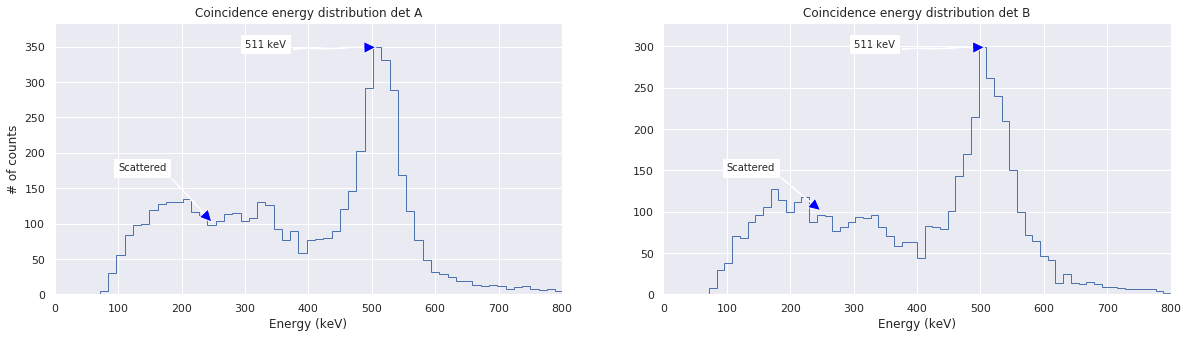

In [48]:
energy = getEnergy(infile)
plotEnergy(energy)

### 3. Energy distributions of the detectors are the edges
A cartoon is shown in the figure above. In a the setup in our lab, the detector is made of $35\times 35$. The edges are those in example $(1,1)\ or\ (1, 35)$
We will specifically use:

 - Pixel $(1,1)$
 - Pixel $(1,17)$
 - Pixel $(1,35)$
 - Pixel $(17,1)$
 - Pixel $(17,17)$
 - Pixel $(17,35)$
 - Pixel $(35,1)$
 - Pixel $(35,17)$
 - Pixel $(35,35)$
 - Pixel $(10,10)$
 - Pixel $(10,17)$
 - Pixel $(10,24)$

In [71]:
def getEnergyEdges(fh):
    '''
    Takes a file and of coincidences and get the LORs pairs and group them for each detector pairs: here 2.
    Parameters
    ----------
    fh : input file name
    
    Variables
    ---------
    energy : dict with names corresponding to the pixel pair plotted
 
    '''
    energy1 = {'Pixel(0,0)':[], 'Pixel(0,17)':[], 'Pixel(0,34)':[], 'Pixel(17,0)':[], 'Pixel(17,17)':[], 
              'Pixel(17,34)':[], 'Pixel(34,0)':[], 'Pixel(34,17)':[], 'Pixel(34,34)':[], 'Pixel(10,10)':[],
               'Pixel(10,17)':[], 'Pixel(10,24)':[]}


    fh = open(fh, "r")
    for line in fh:
        ''' 
        Reads and the split each line. The split line contains 11 items. First 4 are coincidence, 6 are cordinates, 
        (x y e)_1 (x y e)_2 and the last one is time. (x, y)_1 are 4,5 and (x, y)_2 is 7,8    
        '''
        d0, x1, y1, e1, x2, y2, e2 = line.split()        
        d0 = int(d0); x1 = int(x1); y1 = int(y1); e1 = int(e1); x2 =  int(x2); y2 = int(y2); e2 = int(e2)
        
        if d0 == 1:
            if (x1 ==0):
                if (y1 == 0):
                    energy1['Pixel(0,0)'].append(e1)
                elif (y1== 17):
                    energy1['Pixel(0,17)'].append(e1)
                elif (y1== 34):
                    energy1['Pixel(0,34)'].append(e1)
            elif (x1 == 17):
                if (y1 == 1):
                    energy1['Pixel(17,0)'].append(e1)
                elif (y1== 17):
                    energy1['Pixel(17,17)'].append(e1)
                elif (y1 == 34):
                    energy1['Pixel(17,34)'].append(e1)
            elif (x1 == 34):
                if (y1 == 0):
                    energy1['Pixel(34,0)'].append(e1)
                elif (y1== 17):
                    energy1['Pixel(34,17)'].append(e1)
                elif (y1 == 34):
                    energy1['Pixel(34,34)'].append(e1)
            elif (x1 == 10):
                if (y1 == 10):
                    energy1['Pixel(10,10)'].append(e1)
                elif (y1== 17):
                    energy1['Pixel(10,17)'].append(e1)
                elif (y1 == 34):
                    energy1['Pixel(10,24)'].append(e1)

    fh.close()
    
    return energy1

In [72]:
energy_of_some_pixels = getEnergyEdges(infile)

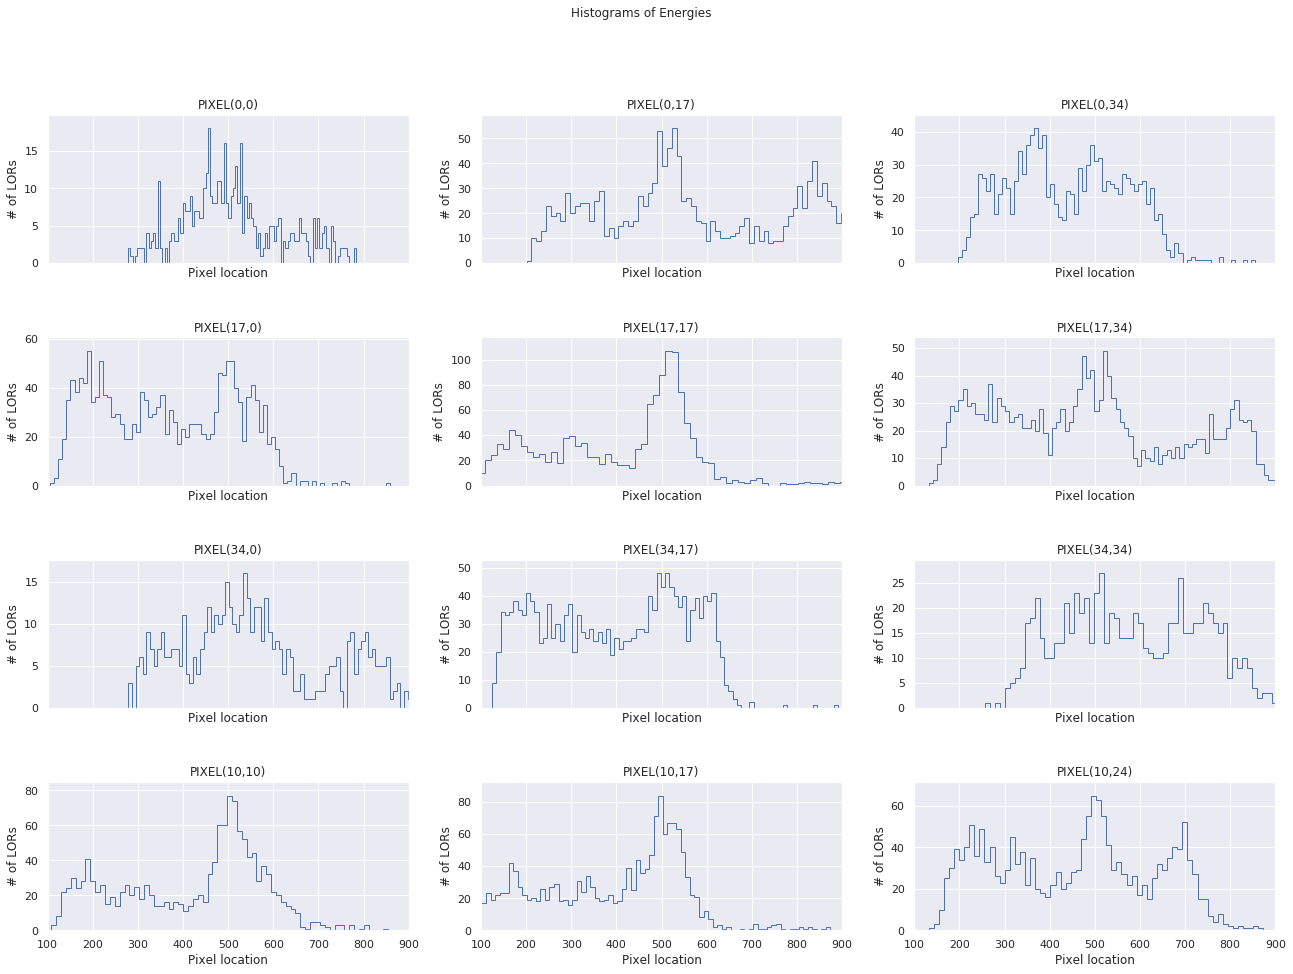

In [86]:
#Plot box plot and swarm plots
fig, axes = plt.subplots(4, 3, sharey=False, sharex=True, figsize = (22,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Histograms of Energies')
#dict_keys = [key for key in energy_of_some_pixels.keys()]

for ax, pixel, name in zip(axes.flatten(), energy_of_some_pixels.values(), energy_of_some_pixels.keys()):
    n, bins, _ = ax.hist(pixel, bins=100, histtype='step') 
    ax.axis([100, 900, 0, np.max(n)*(1+ .10)])
    ax.set(title=name.upper(), xlabel='Pixel location', ylabel='# of LORs')

Box and swarm plots. Sometimes it is much better to visualize the data using box and swarm plot

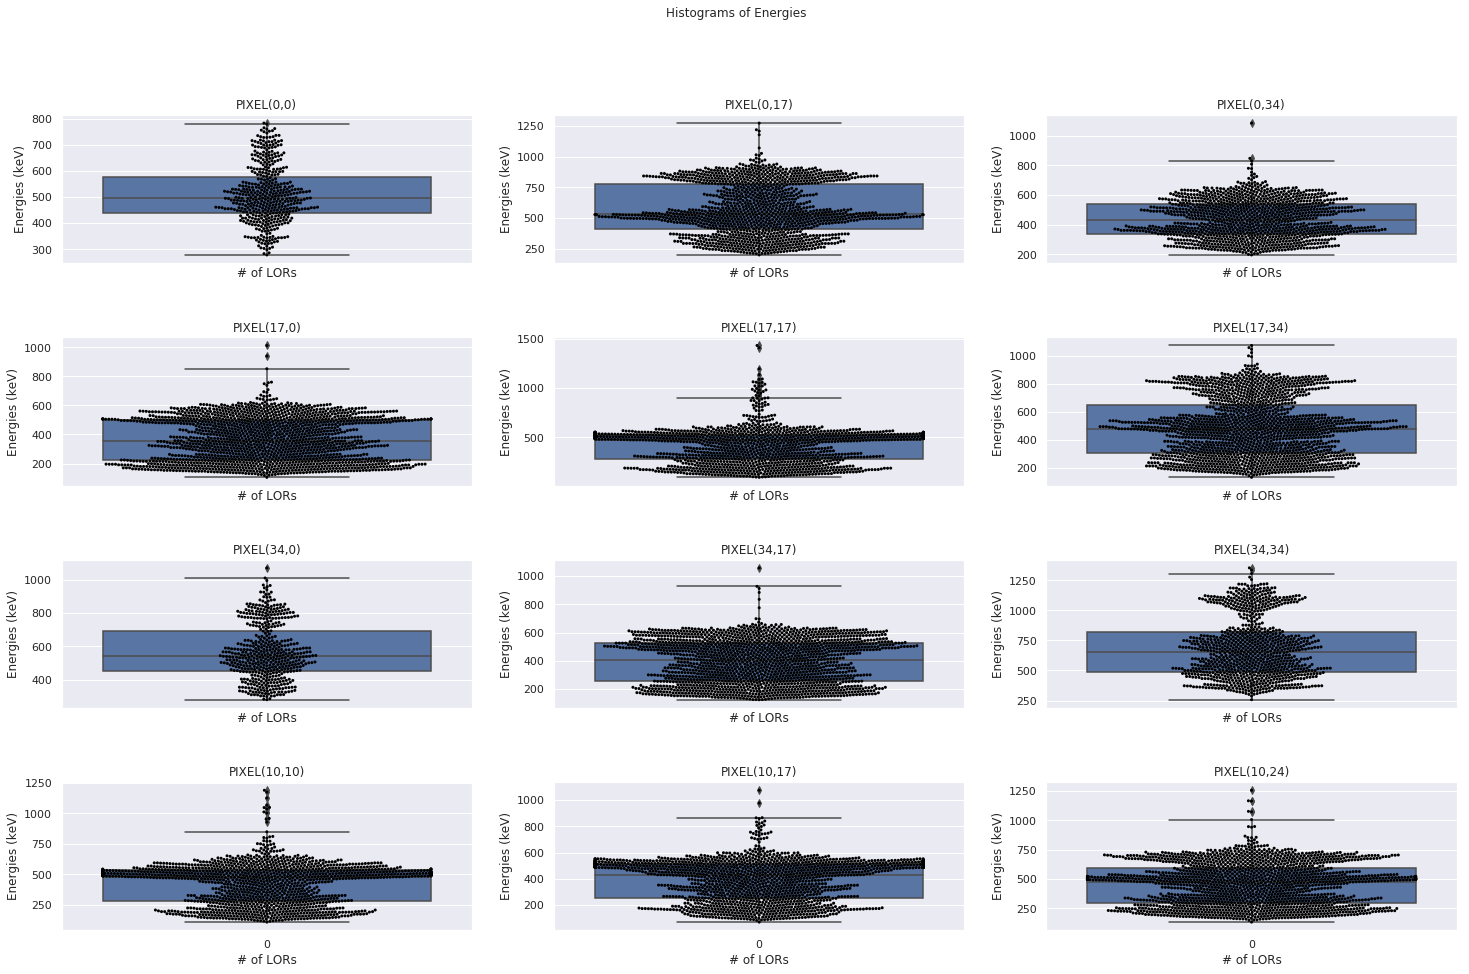

In [77]:
#Plot box plot and swarm plots
fig, axes = plt.subplots(4, 3, sharey=False, sharex=True, figsize = (25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Histograms of Energies')
#dict_keys = [key for key in energy_of_some_pixels.keys()]

for ax, pixel, name in zip(axes.flatten(), energy_of_some_pixels.values(), energy_of_some_pixels.keys()):
    sns.boxplot(data = pixel, ax=ax)
    sns.swarmplot(data = pixel, ax=ax, size=3, color='black')
    ax.set(title=name.upper(), xlabel='# of LORs', ylabel='Energies (keV)')